# EDA(Exploratory Data Analysis)

### 1.Load Datasets
### 2.Clean data(missing values,duplicates,types)
### 3.treat outliers
### 4.Univariate,Bivariate and Multivariate Analysis
### 5.Insights


#### Outlier:A datapoint that is significantly different from other observations or datapoints in a dataset.

### How outliers will come ?
#### 1.Measurement Errors
#### 2.Data Entry mistakes

### Why they are important ?
#### 1.They can be errors
#### 2.They effect the data analysis

### How to identify the outliers?
#### 1.Visualization technique

#### --->Box Plots
#### --->Scatter plots
#### ---> Histogram

#### 2.Statistical Method

#### ---->Interquartile Range(IQR)
#### ---->Z-Score


### Univariate Analysis - a method that analyzes a single variable to describe its characteristics,find patterns and summarize data.
#### It involves only one variable.

### Bivariate Analysis - It gives the relationship between two variables.It helps to discover or find if there is any correlation between the two variables and any association or any connection between the two variables.
#### It involves 2 variables (x & y)

### Multivariate Analysis - To understand how multiple factors interact and influence each other.
#### It involves more than 2 variables.
Example -
How our age,income and education level together influence the purchasing behaviour.


### ETL(Extract Transform Load)

### ELT(Extract Load Transform)

## EDA : <Dataset>
1. Load & Overview
2. Cleaning(missing, dupes, dtypes)
3. Uni,Bi & Multi analysis
4. Outlier - IQR
5. Feature Engineering
6. Key Insights


### Feature Engineering: 
Feature Engineering is the process of turning raw data into useful features that helps to improve the performance of machine learning models.

### 1. Load libraries & Dataset

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

### 3. Load Dataset
 

In [11]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Basic Information & Overview
print("Shape of dataset:", df.shape)
print("\n Data Info",df.info())

# Summary 
print(df.describe())


Shape of dataset: (891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

 Data Info None
         survived      pclass     

In [7]:
# Missing values Analysis
missing=pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missing_percent':(df.isnull().sum()/len(df))*100
})
missing.sort_values(by='missing_percent',ascending=False)

,missing_count,missing_percent
deck,688,77.216611
age,177,19.865320
embarked,2,0.224467
embark_town,2,0.224467
sex,0,0.000000
pclass,0,0.000000
survived,0,0.000000
fare,0,0.000000
parch,0,0.000000
sibsp,0,0.000000


In [10]:
# 4.Handling Missing values
# Fill the numeric missing values with the mean
df['age']=df['age'].fillna(df['age'].mean())

# Fill categorical missing values with mode
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])

# Drop 'deck' column ( too many missing values)
df.drop(columns=['deck'],inplace=True)

print("Missing values are cleaning:\n",df.isnull().sum().sum())





Missing values are cleaning:
 2


In [11]:
# Missing values Analysis
missing=pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missing_percent':(df.isnull().sum()/len(df))*100
})
missing.sort_values(by='missing_percent',ascending=False)

,missing_count,missing_percent
embark_town,2,0.224467
survived,0,0.000000
sex,0,0.000000
age,0,0.000000
sibsp,0,0.000000
pclass,0,0.000000
parch,0,0.000000
fare,0,0.000000
class,0,0.000000
embarked,0,0.000000


#### Insight:We filled important columns and removed highly missing ones.
#### This keeps maximum information while making the dataset clean.

In [16]:
# Duplicates & Data type check 
print("Duplicate rows:",df.duplicated().sum())

# Convert some columns into category type
df['class']=df['class'].astype('category')
df['sex']=df['sex'].astype('category')
df['embarked']=df['embarked'].astype('category')
df.info()



Duplicate rows: 107
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(4), float64(2), int64(4), object(3)
memory usage: 68.7+ KB


### Univariate Analysis for Numerical Features

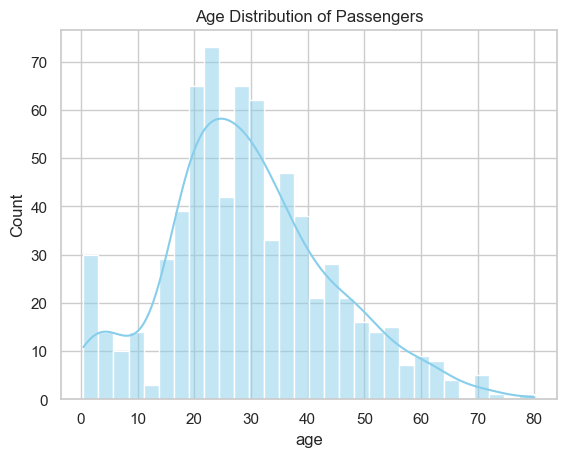

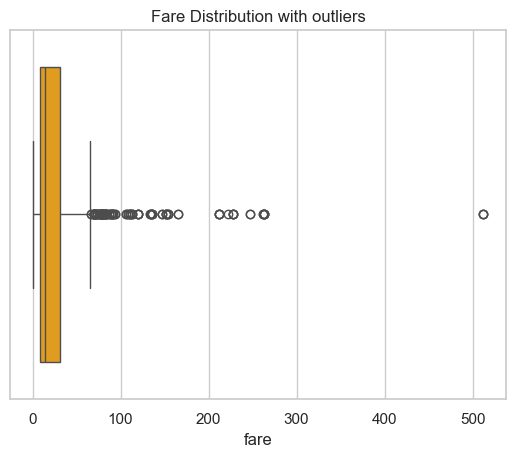

In [12]:
num_cols=df.select_dtypes(include=['float64','int64']).columns
df[num_cols].describe()

#Histogram:Age
sns.histplot(df['age'],bins=30,kde=True,color='skyblue')
plt.title("Age Distribution of Passengers")
plt.show()

# Boxplot:Fare
sns.boxplot(x=df['fare'],color='orange')
plt.title("Fare Distribution with outliers")
plt.show()

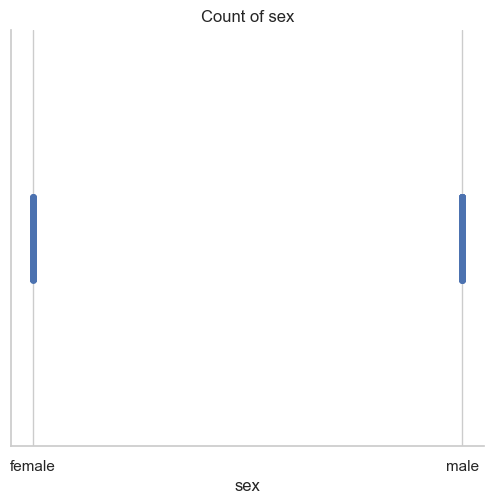

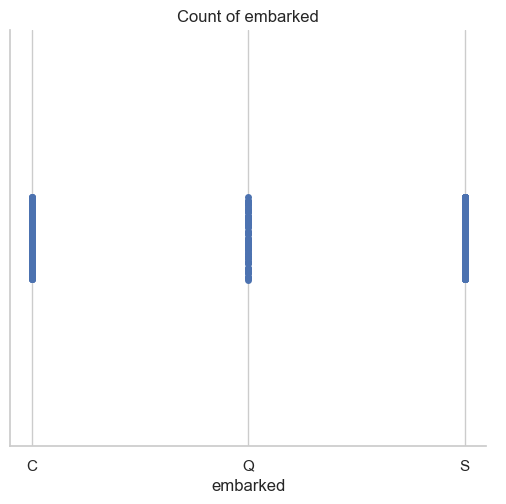

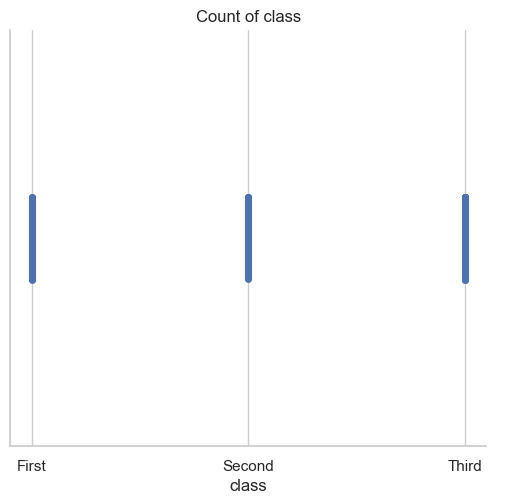

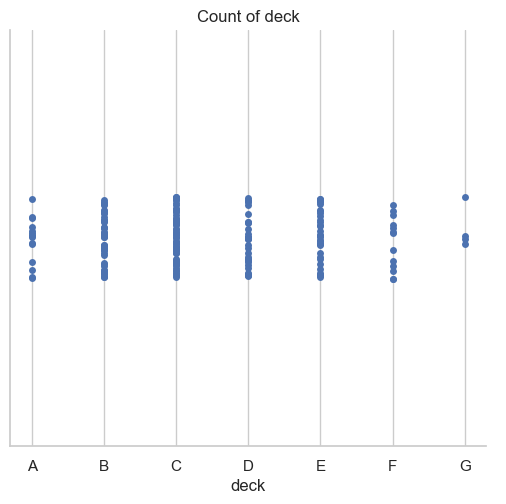

In [17]:
# Univariate Analysis-Categorical Features
cat_clos=df.select_dtypes("category").columns
for col in cat_clos:
    sns.catplot(x=col,data=df)
    plt.title(f"Count of {col}")
    plt.show()

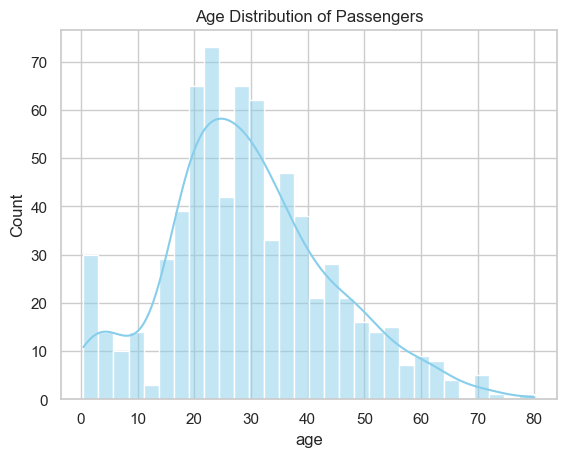

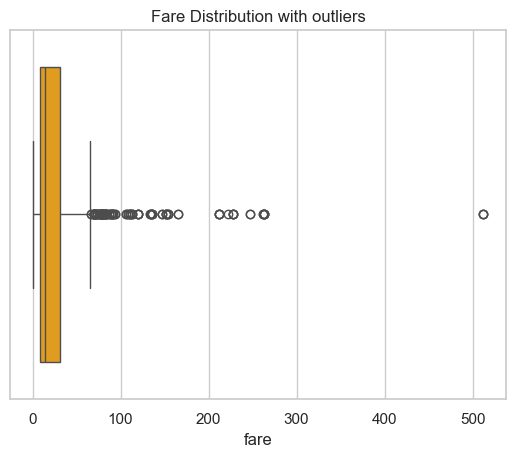

In [ ]:
num_cols=df.select_dtypes(include=['float64','int64']).columns
df[num_cols].describe()

#Histogram:Age
sns.histplot(df['age'],bins=30,kde=True,color='skyblue')
plt.title("Age Distribution of Passengers")
plt.show()

# Boxplot:Fare
sns.boxplot(x=df['fare'],color='orange')
plt.title("Fare Distribution with outliers")
plt.show()

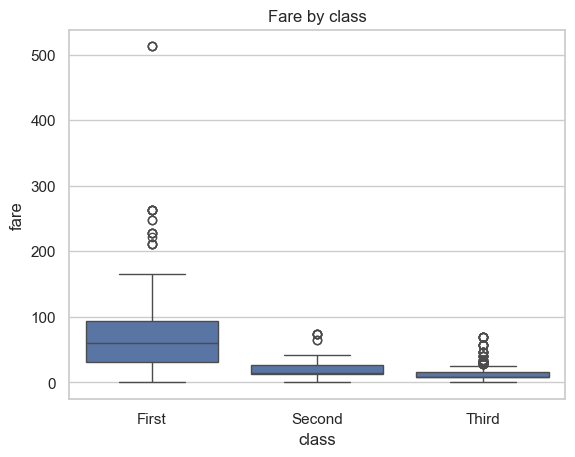

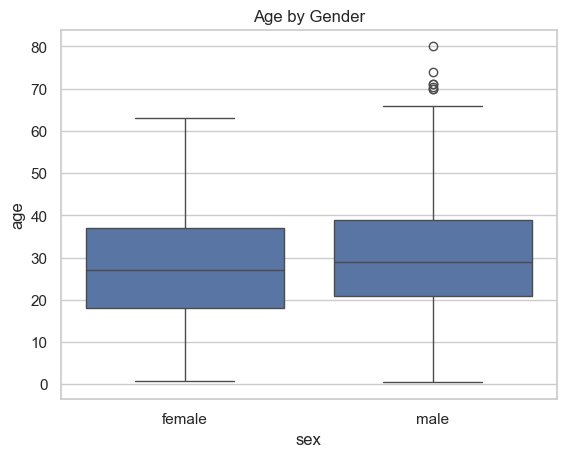

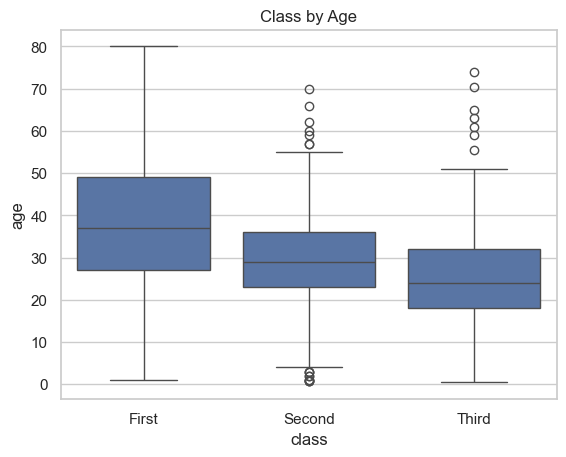

In [20]:
# Bivariate Analysis- Numerical vs Categorical
sns.boxplot(x='class',y='fare',data=df)
plt.title("Fare by class")
plt.show()
sns.boxplot(x='sex',y='age',data=df)
plt.title("Age by Gender")
plt.show()
sns.boxplot(x='class',y='age',data=df)
plt.title("Class by Age")
plt.show()

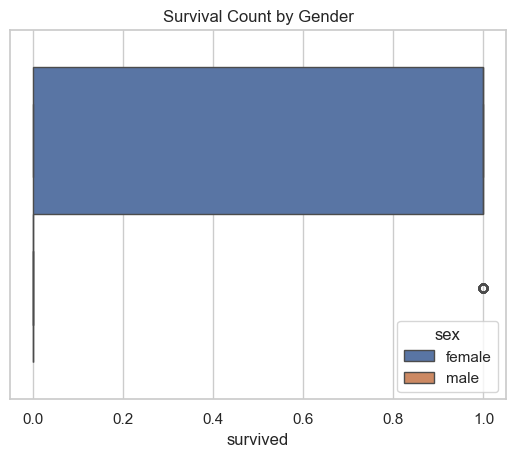

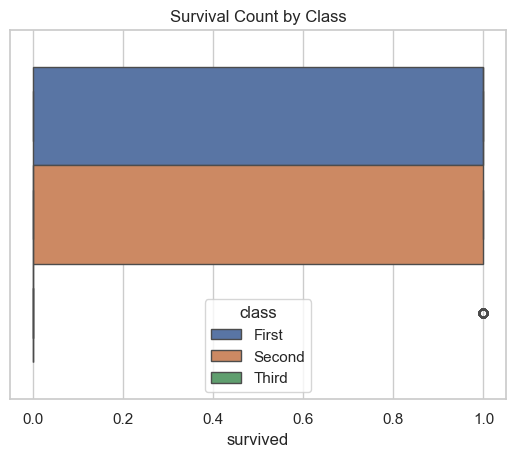

In [24]:
sns.boxplot(x='survived',hue='sex',data=df)
plt.title("Survival Count by Gender")
plt.show()
sns.boxplot(x='survived',hue='class',data=df)
plt.title("Survival Count by Class")
plt.show()

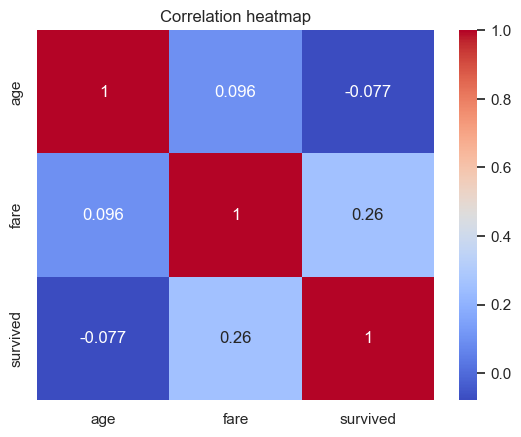

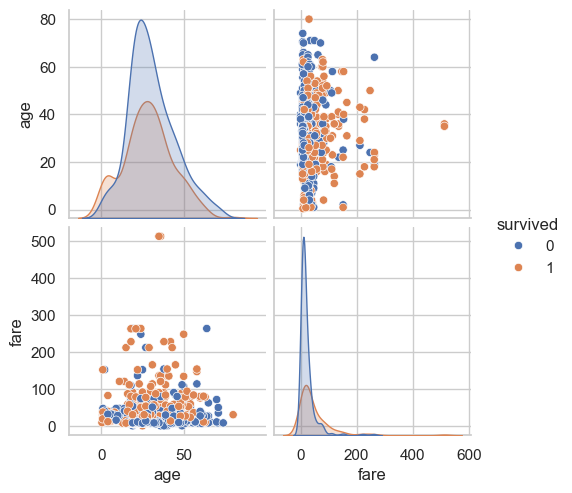

In [27]:
# Corelation and Multivariate Analysis
corr=df[['age','fare','survived']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("Correlation heatmap")
plt.show()

sns.pairplot(df[['age','fare','survived']],hue='survived')

### Insights:
#### 1.Fare has a positive correlation with survival
#### 2.Age shows a slight negative correlation with survival


Number of outliers in fare: 116


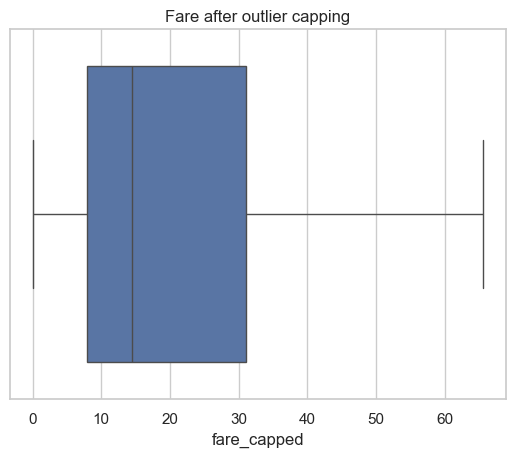

In [35]:
# Outlier Detection using IQR
Q1=df['fare'].quantile(0.25)
Q3=df['fare'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

outliers=df[(df['fare']<lower)|(df['fare']>upper)]
print("Number of outliers in fare:",len(outliers))

# Outliers
df['fare_capped']=df['fare'].clip(lower,upper)
sns.boxplot(x=df['fare_capped'])
plt.title("Fare after outlier capping")
plt.show()

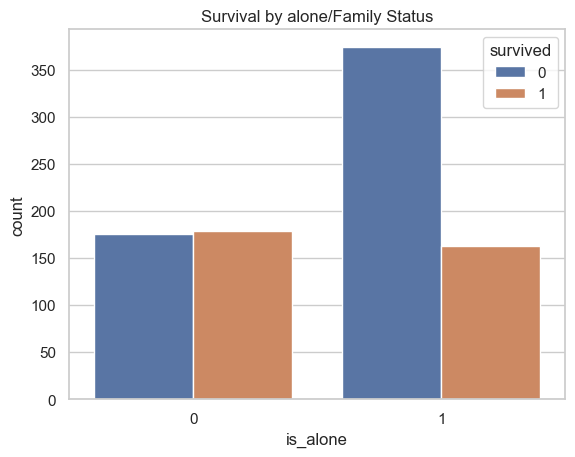

,family_size,is_alone,survived
0,2,0,0
1,2,0,1
2,1,1,1
3,2,0,1
4,1,1,0


In [36]:
# Feature Engineering

# Create new Features
df['family_size']=df['sibsp']+df['parch']+1
df['is_alone']=(df['family_size']==1).astype(int)

sns.countplot(x='is_alone',hue='survived',data=df)
plt.title("Survival by alone/Family Status")
plt.show()
df[['family_size','is_alone','survived']].head()

In [37]:
# Export the cleaned data
df.to_csv("Titanic_cleaned.csv",index=False)
print("\n Cleaned Titanic data saved as titanic_cleaned.csv")



 Cleaned Titanic data saved as titanic_cleaned.csv


In [38]:
import os
print(os.getcwd())

c:\Users\Divya\Desktop\Tekworks
